In [22]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


In [23]:
resource = pd.read_excel('C:/Users/santi/OneDrive - Universidad Pedagogica Nacional/El_bosque/Segundo_cuatrimestre/machine_learning_1/Dataset.xlsx' , sheet_name='Variables')
resource

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,REGIONAL,regional de instalación del servicio
1,NaN,DEPARTAMENTO,Departamento de instalación del servicio
2,NaN,TECNOL,Tipo de tecnología del servicio
3,NaN,GERENCIA,Gerencia de venta del servicio
4,NaN,CANAL_HOMOLOGADO_MILLICON,Canal de venta del servicio
5,NaN,tipo_fuerza_venta,Tipo de fuerza o equipo que realizó la venta
6,NaN,estrato,Estrato donde fue instalado el servicio
7,NaN,antiguedad_meses,Antigüedad del cliente al momento de solicitar...
8,NaN,productos,"Productos solicitados TV= televisión, TO=Telef..."
9,NaN,portafolio,cantidad de productos adquiridos


In [24]:

df = pd.read_excel('C:/Users/santi/OneDrive - Universidad Pedagogica Nacional/El_bosque/Segundo_cuatrimestre/machine_learning_1/Dataset.xlsx' , sheet_name='DB')


In [25]:
pd.set_option('display.max_columns',None)
df.head()

,REGIONAL,DEPARTAMENTO,TECNOL,GERENCIA,CANAL_HOMOLOGADO_MILLICON,tipo_fuerza_venta,estrato,antiguedad_meses,productos,portafolio,no_serv_tecnicos,fallo,asesoria_factura,pedidos_peticiones,reagendamiento,asesoria_servicios,retencion,Otras,quejas_fraude,traslado,Incumplimiento_pago,cliente_id
0,COSTA,MAGDALENA,HFC,CONTACT,SAC,INDIRECTA,3,19.0,TV+BA,Duo,1.0,No funciona línea telefónica,0,0,0,0,0,0,0,0,0,1004369760
1,COSTA,MAGDALENA,HFC,CONTACT,SAC,INDIRECTA,3,19.0,TV+BA,Duo,1.0,No funciona línea telefónica,0,0,0,0,0,0,0,0,0,1004369760
2,NOROCCIDENTE,ANTIOQUIA,HFC,CONTACT,SAC,INDIRECTA,1,1.0,TV,Individual,1.0,No navega,0,0,0,0,0,0,0,0,0,1004371304
3,COSTA,MAGDALENA,HFC,CONTACT,IN BOUND,INDIRECTA,3,7.0,TO+TV+BA,Trio,NaN,NaN,0,0,0,0,0,0,0,0,1,1004382867
4,COSTA,MAGDALENA,HFC,CONTACT,IN BOUND,INDIRECTA,3,7.0,TO+TV+BA,Trio,NaN,NaN,0,0,0,0,0,0,0,0,1,1004382867


In [26]:
cols = list(df.columns)
cols

unique_values = {}
for col in cols:
    unique_values[col] = df[col].unique()

unique_values_df = pd.DataFrame.from_dict(unique_values, orient='index').transpose()
unique_values_df

,REGIONAL,DEPARTAMENTO,TECNOL,GERENCIA,CANAL_HOMOLOGADO_MILLICON,tipo_fuerza_venta,estrato,antiguedad_meses,productos,portafolio,no_serv_tecnicos,fallo,asesoria_factura,pedidos_peticiones,reagendamiento,asesoria_servicios,retencion,Otras,quejas_fraude,traslado,Incumplimiento_pago,cliente_id
0,COSTA,MAGDALENA,HFC,CONTACT,SAC,INDIRECTA,3,19.0,TV+BA,Duo,1.0,No funciona línea telefónica,0,0,0,0,0,0,0,0,0,1004369760
1,NOROCCIDENTE,ANTIOQUIA,REDCO,TIENDAS,IN BOUND,DIRECTA,1,1.0,TV,Individual,NaN,No navega,1,1,1,1,1,1,1,1,1,1004371304
2,EJE CAFETERO,RISARALDA,GPON,FVD,TIENDAS,None,SE,7.0,TO+TV+BA,Trio,None,NaN,None,None,None,None,None,None,None,None,None,1004382867
3,ORIENTE,BOYACA,DTH,AUR&CONSTRUCTORES,FVD,None,4,NaN,TO+BA,None,None,Servicio intermitente,None,None,None,None,None,None,None,None,None,1004490958
4,CENTRO,CUNDINAMARCA,None,RETAIL,DEALERS,None,2,0.0,BA,None,None,Sin señal,None,None,None,None,None,None,None,None,None,1004686283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98589420.0
12102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98589757.0
12103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98590638.0
12104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98591843.0


In [27]:
df['no_serv_tecnicos'].isna().sum()/df.shape[0]


0.6535452813158159

In [28]:
df[df['antiguedad_meses']==255.0]
df['estrato'].unique()

array([3, 1, 'SE', 4, 2, 5, 6], dtype=object)

In [29]:
round(df[df['estrato']=='SE'].shape[0]/df.shape[0]*100,2)

12.98

In [30]:
df['estrato'].isna().sum()

0

In [31]:
df['estrato'] = df['estrato'].replace('SE',np.nan)
df['estrato'] = df['estrato'].fillna(df['estrato'].mode()[0])

df['no_serv_tecnicos']  = df['no_serv_tecnicos'].fillna(0.0)
df['fallo'] = df['fallo'].fillna('Sin fallo')
df['estrato']

0        3.0
1        3.0
2        1.0
3        3.0
4        3.0
        ... 
19937    2.0
19938    2.0
19939    2.0
19940    2.0
19941    2.0
Name: estrato, Length: 19942, dtype: float64

In [32]:
df['DEPARTAMENTO'].value_counts()

DEPARTAMENTO
ANTIOQUIA             11655
CUNDINAMARCA           1770
VALLE DEL CAUCA        1422
RISARALDA               971
SANTANDER               797
BOLIVAR                 795
CALDAS                  512
CORDOBA                 370
QUINDIO                 364
ATLANTICO               271
CESAR                   265
ATLÁNTICO               183
SUCRE                   141
TOLIMA                  126
MAGDALENA               108
NORTE DE SANTANDER       74
META                     51
CAUCA                    37
BOYACA                   27
LA GUAJIRA                1
HUILA                     1
NARINO                    1
Name: count, dtype: int64

In [33]:
df['DEPARTAMENTO'] = df['DEPARTAMENTO'].replace('ATLÁNTICO', 'ATLANTICO')

In [34]:
target_departmens = ['ANTIOQUIA', 'CUNDINAMARCA', 'VALLE DEL CAUCA', 'BOLIVAR', 'SANTANDER', 'CALDAS', 'CORDOBA',
                'CESAR', 'ATLANTICO', 'QUINDIO']

df['DEPARTAMENTO_NEW'] = df['DEPARTAMENTO'].apply(lambda x:x if x in target_departmens else 'OTROS')
# print(df['DEPARTAMENTO_NEW'].value_counts())

target_fallo = ['Sin fallo','No navega', 'Sin señal', 'Servicio intermitente']

df['fallo_new'] = df['fallo'].apply(lambda x:x if x in target_fallo else 'otros')

df['fallo_new'].value_counts()

df = df.drop(['DEPARTAMENTO', 'fallo'], axis=1)

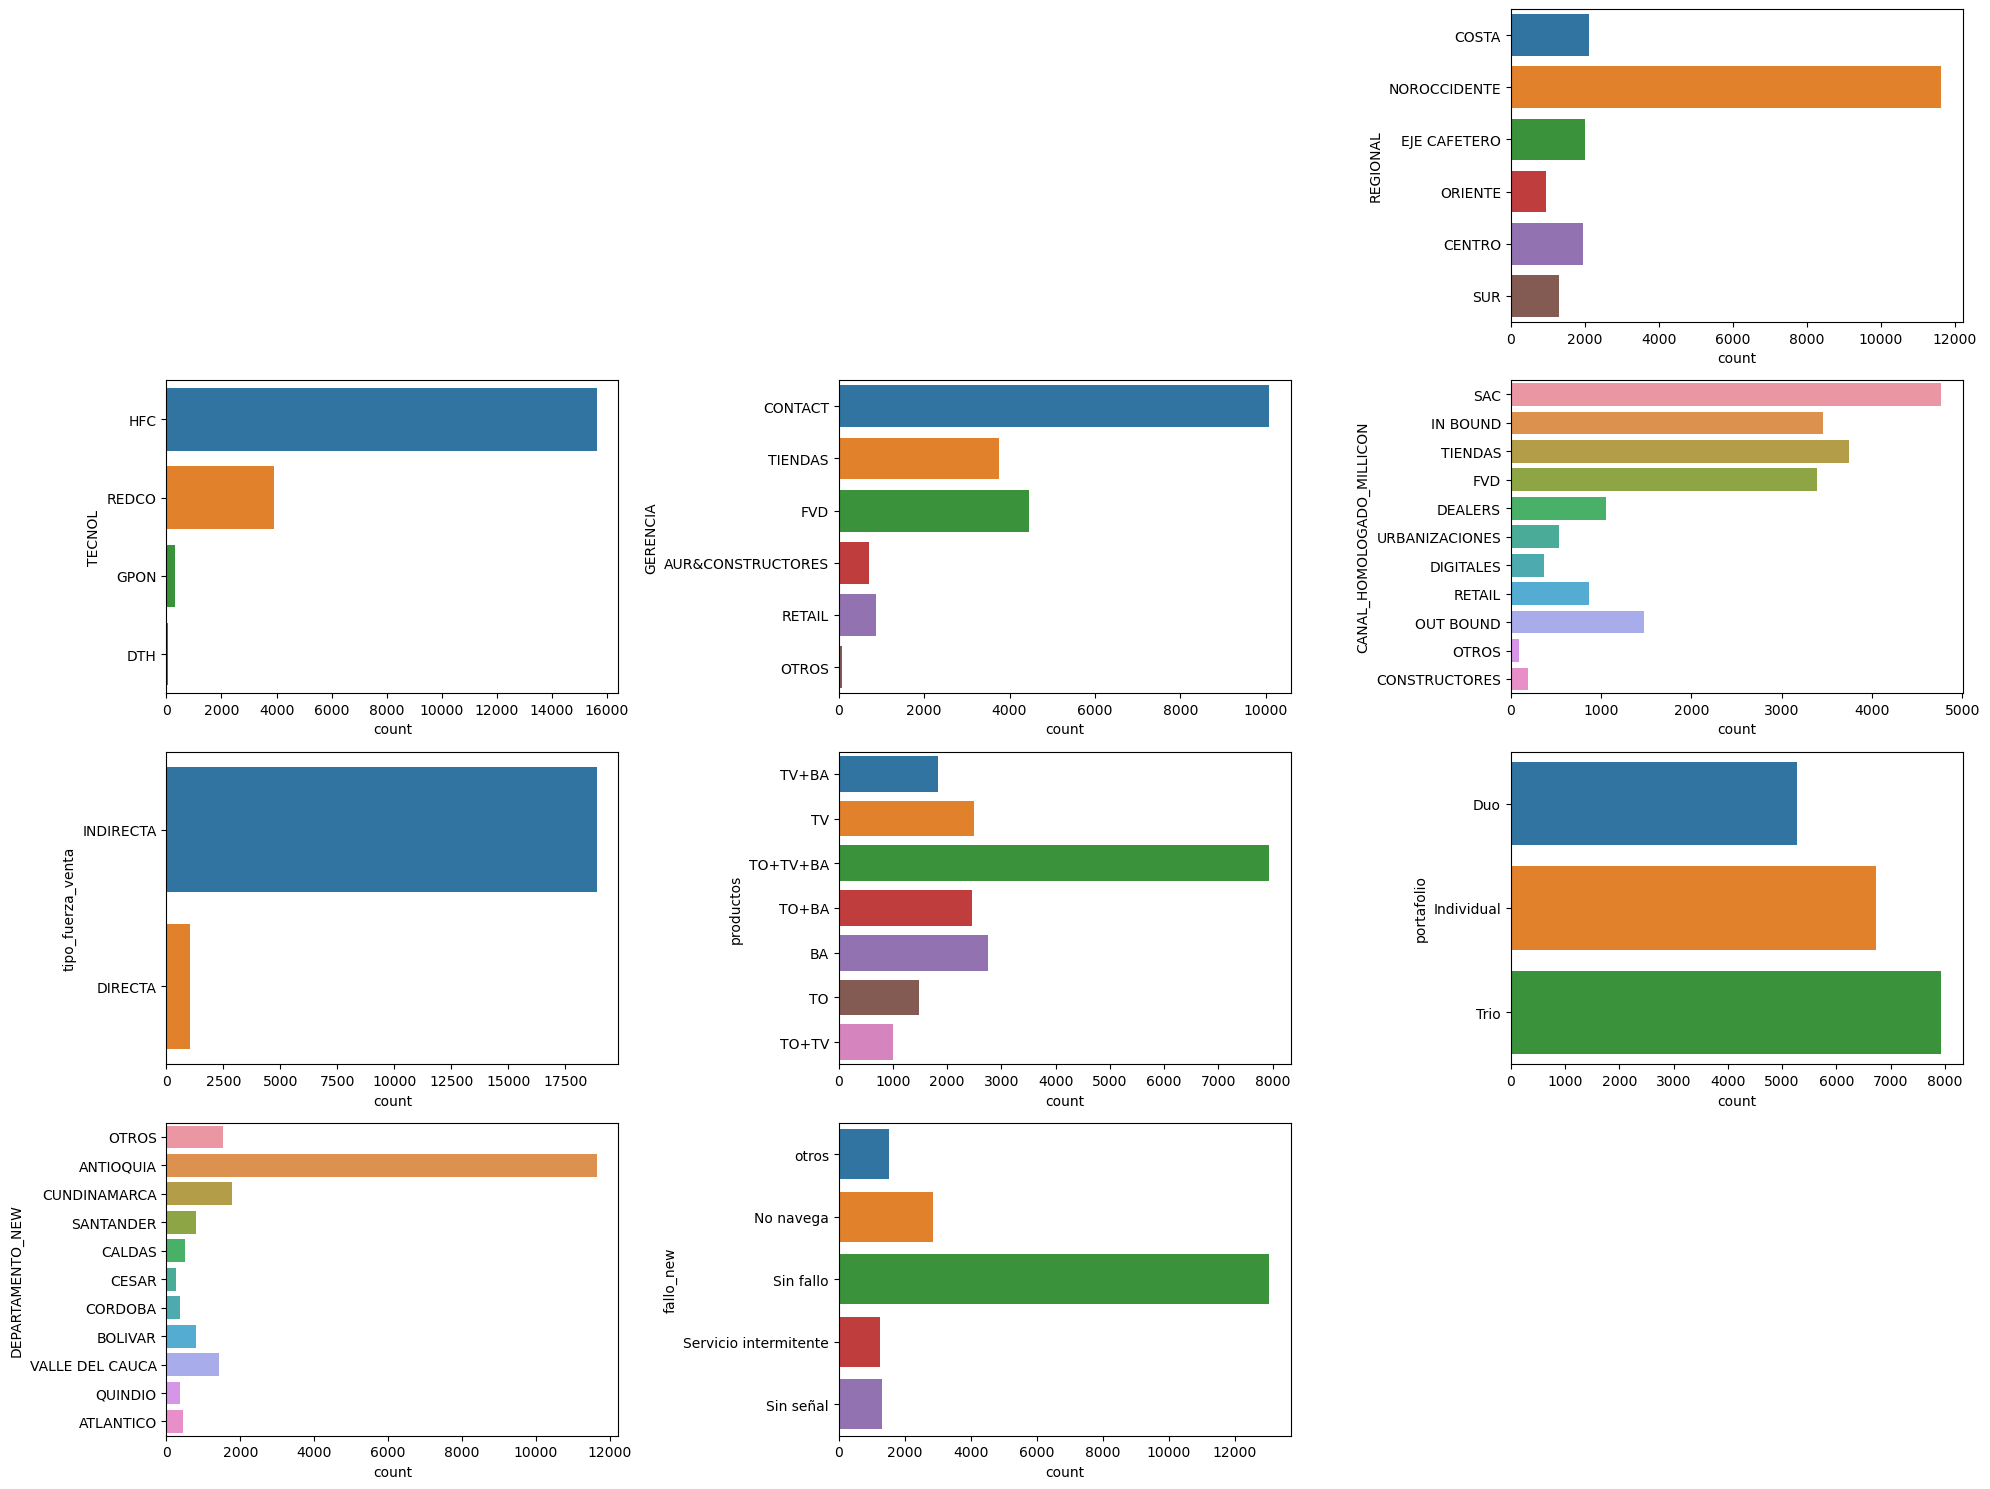

In [35]:
categorical_variables = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(20,15))

for i, var in enumerate(categorical_variables):
    plt.subplot(4,3,3+i)
    sns.countplot(y=var,data=df)
    
plt.tight_layout()
plt.show()

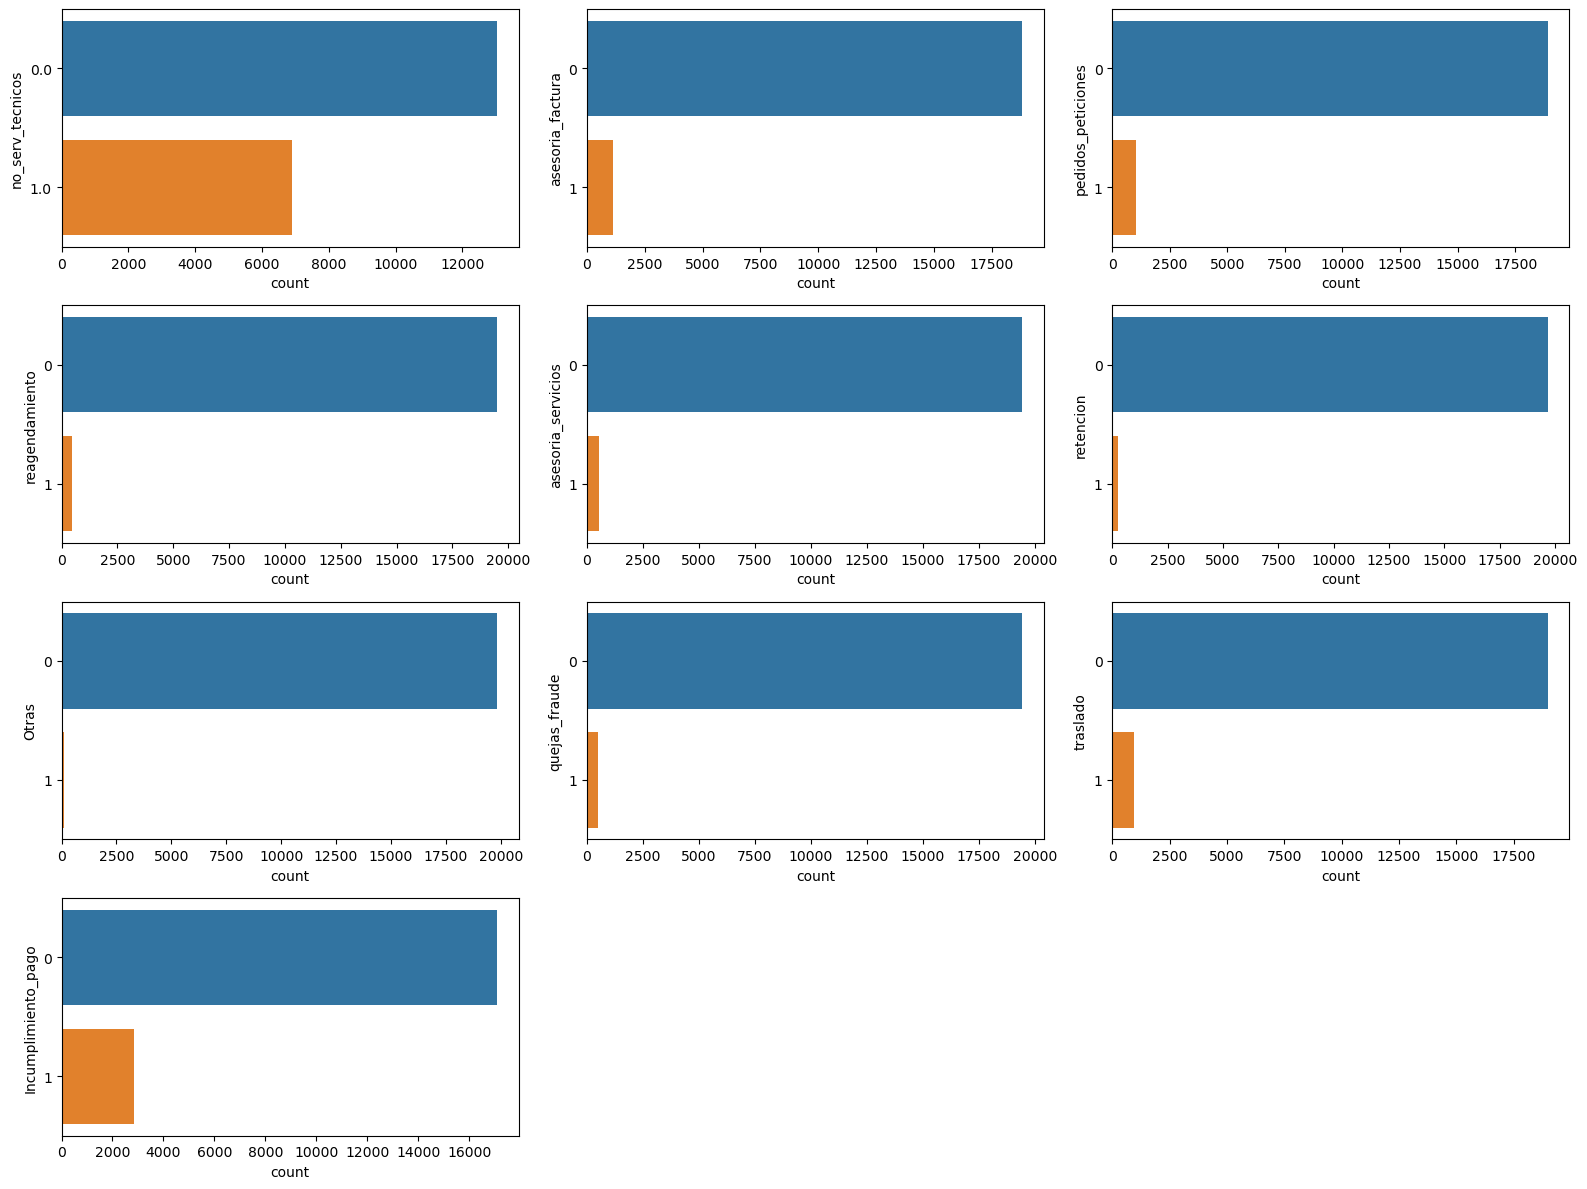

In [36]:
plt.figure(figsize=(16,12))

cat_vars = ['no_serv_tecnicos', 'asesoria_factura',
            'pedidos_peticiones', 'reagendamiento', 'asesoria_servicios',
            'retencion', 'Otras', 'quejas_fraude', 'traslado',
            'Incumplimiento_pago']

for i, var in enumerate(cat_vars):
    plt.subplot(4, 3, i+1)
    sns.countplot(y=var, data=df)

plt.tight_layout()

plt.show()

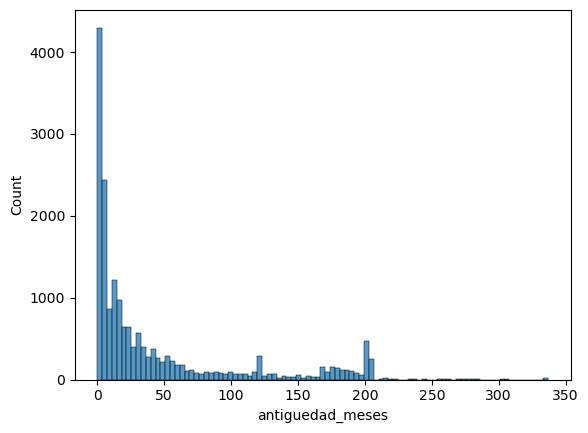

In [37]:
sns.histplot(x = 'antiguedad_meses',data= df)
plt.show()

In [42]:
df= df.fillna(0)
df_dummies = pd.get_dummies(df)
df_dummies = df_dummies.astype(int)
print(df_dummies.shape)
df_dummies

(19942, 68)


,estrato,antiguedad_meses,no_serv_tecnicos,asesoria_factura,pedidos_peticiones,reagendamiento,asesoria_servicios,retencion,Otras,quejas_fraude,traslado,Incumplimiento_pago,cliente_id,REGIONAL_CENTRO,REGIONAL_COSTA,REGIONAL_EJE CAFETERO,REGIONAL_NOROCCIDENTE,REGIONAL_ORIENTE,REGIONAL_SUR,TECNOL_DTH,TECNOL_GPON,TECNOL_HFC,TECNOL_REDCO,GERENCIA_AUR&CONSTRUCTORES,GERENCIA_CONTACT,GERENCIA_FVD,GERENCIA_OTROS,GERENCIA_RETAIL,GERENCIA_TIENDAS,CANAL_HOMOLOGADO_MILLICON_CONSTRUCTORES,CANAL_HOMOLOGADO_MILLICON_DEALERS,CANAL_HOMOLOGADO_MILLICON_DIGITALES,CANAL_HOMOLOGADO_MILLICON_FVD,CANAL_HOMOLOGADO_MILLICON_IN BOUND,CANAL_HOMOLOGADO_MILLICON_OTROS,CANAL_HOMOLOGADO_MILLICON_OUT BOUND,CANAL_HOMOLOGADO_MILLICON_RETAIL,CANAL_HOMOLOGADO_MILLICON_SAC,CANAL_HOMOLOGADO_MILLICON_TIENDAS,CANAL_HOMOLOGADO_MILLICON_URBANIZACIONES,tipo_fuerza_venta_DIRECTA,tipo_fuerza_venta_INDIRECTA,productos_BA,productos_TO,productos_TO+BA,productos_TO+TV,productos_TO+TV+BA,productos_TV,productos_TV+BA,portafolio_Duo,portafolio_Individual,portafolio_Trio,DEPARTAMENTO_NEW_ANTIOQUIA,DEPARTAMENTO_NEW_ATLANTICO,DEPARTAMENTO_NEW_BOLIVAR,DEPARTAMENTO_NEW_CALDAS,DEPARTAMENTO_NEW_CESAR,DEPARTAMENTO_NEW_CORDOBA,DEPARTAMENTO_NEW_CUNDINAMARCA,DEPARTAMENTO_NEW_OTROS,DEPARTAMENTO_NEW_QUINDIO,DEPARTAMENTO_NEW_SANTANDER,DEPARTAMENTO_NEW_VALLE DEL CAUCA,fallo_new_No navega,fallo_new_Servicio intermitente,fallo_new_Sin fallo,fallo_new_Sin señal,fallo_new_otros
0,3,19,1,0,0,0,0,0,0,0,0,0,1004369760,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,3,19,1,0,0,0,0,0,0,0,0,0,1004369760,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,1,1,1,0,0,0,0,0,0,0,0,0,1004371304,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,3,7,0,0,0,0,0,0,0,0,0,1,1004382867,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,3,7,0,0,0,0,0,0,0,0,0,1,1004382867,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19937,2,0,0,0,0,0,0,0,0,0,0,1,98589757,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
19938,2,0,0,0,0,0,0,0,0,0,0,1,98589757,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
19939,2,89,1,0,0,0,0,0,0,0,0,0,98590638,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
19940,2,36,0,0,1,0,0,0,0,0,0,0,98591843,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [43]:
df_dummies = df_dummies.dropna()

X = df_dummies.drop(['cliente_id', 'Incumplimiento_pago'], axis = 1)
#X = df_dummies.drop(['cliente_id', 'Incumplimiento_pago'], axis = 1)
y = df_dummies['Incumplimiento_pago']

In [44]:
# df = df.dropna()
# numerical_variables = df.select_dtypes(include = ['int', 'float']).columns
# X = df[numerical_variables].drop(['cliente_id', 'Incumplimiento_pago'], axis = 1)
# #X = df.drop(['cliente_id', 'Incumplimiento_pago'], axis = 1)
# y = df['Incumplimiento_pago']

In [ ]:
#estrato_rep = df['estrato'].drop_duplicates(inplace= True)
# estrato_rep = df['estrato'].drop_duplicates().count()
# estrato_rep_index = list(df['estrato'].drop_duplicates().index)
# estrato_rep_index, estrato_rep

In [ ]:
# def data_rep(func):
#     rep = {}
#     for i in func:
#         if i in rep:
#             rep[i] += 1
#         else:
#             rep[i] = 0
#     return rep
# estrato_rep = data_rep(df['estrato'])
# estrato_rep

In [ ]:
# df['antiguedad_meses'] = df['antiguedad_meses'].fillna(0.0)
# old_rep = data_rep(df['antiguedad_meses'])
# def months_zero(func):
#     old_delete = {}
#     for i in old_rep:
#         if old_rep[i] == 0:
#             old_delete[i] = old_rep[i]
#     return old_delete
# old_delete = months_zero(old_rep)
# for i in old_delete:
#     del old_rep[i]
# print(len(old_rep), 'número de meses en los que hay uno o más valores registrados')
# sns.histplot(old_rep.keys())
# plt.show()



Se debe depurar las variables que no son necesarias para realizar el algoritmo de machine learning, además se deben definir las variables independientes y dependientes

In [ ]:
# df = df.dropna()
# numerical_variables = df.select_dtypes(include=['int','float']).columns
# X = df[numerical_variables].drop(['cliente_id','Incumplimiento_pago'], axis=1)
# # X = X.dropna()
# y = df['Incumplimiento_pago']
# X.columns.values

array(['estrato', 'antiguedad_meses', 'no_serv_tecnicos',
       'asesoria_factura', 'pedidos_peticiones', 'reagendamiento',
       'asesoria_servicios', 'retencion', 'Otras', 'quejas_fraude',
       'traslado'], dtype=object)

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13959, 66), (5983, 66), (13959,), (5983,))

In [46]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()


In [49]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


print('Accuracy = '+str(accuracy_score(y_test,model_pred)))
print('Precision = '+str(precision_score(y_test,model_pred)))
print('Recall = '+str(recall_score(y_test,model_pred)))
print('F_1 = '+str(f1_score(y_test,model_pred)))

Accuracy = 0.862945010864115
Precision = 0.5441176470588235
Recall = 0.044794188861985475
F_1 = 0.08277404921700224


El resultado anterior muestra que el modelo de regresión logística no es bueno, según las métricas de Recall y F_1

c:\Users\santi\miniconda3\envs\mi_entorno\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0 1]


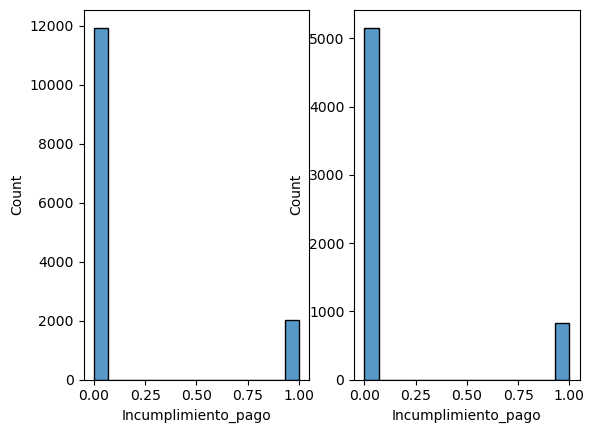

In [48]:
model = lr.fit(X_train, y_train)
model_pred = model.predict(X_test)
print(np.unique(model_pred))
fig, axes = plt.subplots(1,2)
sns.histplot(y_train, ax=axes[0])
sns.histplot(y_test, ax=axes[1])
plt.show()

In [50]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))
print(y_train.value_counts())


Incumplimiento_pago
0    0.854646
1    0.145354
Name: proportion, dtype: float64
Incumplimiento_pago
0    0.861942
1    0.138058
Name: proportion, dtype: float64
Incumplimiento_pago
0    11930
1     2029
Name: count, dtype: int64


In [67]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE, SMOTENC
from imblearn.combine import SMOTETomek, SMOTEENN

from collections import Counter

RUS = RandomUnderSampler()
SMOTE = SMOTE()
#SMOTENC = SMOTENC()
SMOTETomek = SMOTETomek()
SMOTEENN = SMOTEENN()

#Apliquemos las técnicas de balanceo

X_train_rus, y_train_rus = RUS.fit_resample(X_train, y_train)
X_train_smote, y_train_smote = SMOTE.fit_resample(X_train, y_train)
X_train_smotetomek, y_train_smotetomek = SMOTETomek.fit_resample(X_train, y_train)
X_train_smoteenn, y_train_smoteenn = SMOTEENN.fit_resample(X_train, y_train)

print(f'Cantida de datos originales para cada etiqueta: {Counter(y_train)}')
print(f'Cantida de datos aplicando RUS para cada etiqueta: {Counter(y_train_rus)}')
print(f'Cantida de datos aplicando SMOTE para cada etiqueta: {Counter(y_train_smote)}')
print(f'Cantida de datos aplicando SMOTETomek para cada etiqueta: {Counter(y_train_smotetomek)}')
print(f'Cantida de datos aplicando SMOTEENN para cada etiqueta: {Counter(y_train_smoteenn)}')


Cantida de datos originales para cada etiqueta: Counter({0: 11930, 1: 2029})
Cantida de datos aplicando RUS para cada etiqueta: Counter({0: 2029, 1: 2029})
Cantida de datos aplicando SMOTE para cada etiqueta: Counter({1: 11930, 0: 11930})
Cantida de datos aplicando SMOTETomek para cada etiqueta: Counter({1: 11848, 0: 11848})
Cantida de datos aplicando SMOTEENN para cada etiqueta: Counter({1: 10468, 0: 8648})


In [52]:
model_pred_df = pd.DataFrame(model_pred)
model_pred_df.rename(columns={0:'Prediction'},inplace=True)
y_test = y_test.reset_index().drop('index', axis = 1)
df_prueba = pd.concat([model_pred_df, y_test], axis = 1)
df_prueba


,Prediction,Incumplimiento_pago
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
5978,0,0
5979,0,0
5980,0,0
5981,0,0


In [53]:
X_test_prueba = X_test.reset_index()
X_test_prueba

,index,estrato,antiguedad_meses,no_serv_tecnicos,asesoria_factura,pedidos_peticiones,reagendamiento,asesoria_servicios,retencion,Otras,quejas_fraude,traslado,REGIONAL_CENTRO,REGIONAL_COSTA,REGIONAL_EJE CAFETERO,REGIONAL_NOROCCIDENTE,REGIONAL_ORIENTE,REGIONAL_SUR,TECNOL_DTH,TECNOL_GPON,TECNOL_HFC,TECNOL_REDCO,GERENCIA_AUR&CONSTRUCTORES,GERENCIA_CONTACT,GERENCIA_FVD,GERENCIA_OTROS,GERENCIA_RETAIL,GERENCIA_TIENDAS,CANAL_HOMOLOGADO_MILLICON_CONSTRUCTORES,CANAL_HOMOLOGADO_MILLICON_DEALERS,CANAL_HOMOLOGADO_MILLICON_DIGITALES,CANAL_HOMOLOGADO_MILLICON_FVD,CANAL_HOMOLOGADO_MILLICON_IN BOUND,CANAL_HOMOLOGADO_MILLICON_OTROS,CANAL_HOMOLOGADO_MILLICON_OUT BOUND,CANAL_HOMOLOGADO_MILLICON_RETAIL,CANAL_HOMOLOGADO_MILLICON_SAC,CANAL_HOMOLOGADO_MILLICON_TIENDAS,CANAL_HOMOLOGADO_MILLICON_URBANIZACIONES,tipo_fuerza_venta_DIRECTA,tipo_fuerza_venta_INDIRECTA,productos_BA,productos_TO,productos_TO+BA,productos_TO+TV,productos_TO+TV+BA,productos_TV,productos_TV+BA,portafolio_Duo,portafolio_Individual,portafolio_Trio,DEPARTAMENTO_NEW_ANTIOQUIA,DEPARTAMENTO_NEW_ATLANTICO,DEPARTAMENTO_NEW_BOLIVAR,DEPARTAMENTO_NEW_CALDAS,DEPARTAMENTO_NEW_CESAR,DEPARTAMENTO_NEW_CORDOBA,DEPARTAMENTO_NEW_CUNDINAMARCA,DEPARTAMENTO_NEW_OTROS,DEPARTAMENTO_NEW_QUINDIO,DEPARTAMENTO_NEW_SANTANDER,DEPARTAMENTO_NEW_VALLE DEL CAUCA,fallo_new_No navega,fallo_new_Servicio intermitente,fallo_new_Sin fallo,fallo_new_Sin señal,fallo_new_otros
0,14186,4,2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,16856,2,34,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,14485,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,13942,2,142,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,3269,3,81,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5978,2094,1,20,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5979,4469,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
5980,2182,1,132,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5981,15878,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [54]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

In [55]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, matthews_corrcoef, balanced_accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
print('Accuracy = '+str(accuracy_score(y_test,model_pred)))
print('Precision = '+str(precision_score(y_test,model_pred)))
print('Recall = '+str(recall_score(y_test,model_pred)))
print('F_1 = '+str(f1_score(y_test,model_pred)))
print('MCC = '+str(matthews_corrcoef(y_test,model_pred)))
print('BACC = '+str(balanced_accuracy_score(y_test,model_pred)))


Accuracy = 0.862945010864115
Precision = 0.5441176470588235
Recall = 0.044794188861985475
F_1 = 0.08277404921700224
MCC = 0.1262110876624946
BACC = 0.5193914710065212


In [56]:
clf1 = LinearDiscriminantAnalysis()
clf1.fit(X_train, y_train)
clf1_pred = clf1.predict(X_test)

clf2 = GaussianNB()
clf2.fit(X_train, y_train)
clf2_pred = clf2.predict(X_test)

clf3 = QuadraticDiscriminantAnalysis()
clf3.fit(X_train, y_train)
clf3_pred = clf3.predict(X_test)

c:\Users\santi\miniconda3\envs\mi_entorno\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [57]:
print('Accuracy = '+str(accuracy_score(y_test,clf1_pred)))
print('Precision = '+str(precision_score(y_test,clf1_pred)))
print('Recall = '+str(recall_score(y_test,clf1_pred)))
print('F_1 = '+str(f1_score(y_test,clf1_pred)))
print('MCC = '+str(matthews_corrcoef(y_test,clf1_pred)))
print('BACC = '+str(balanced_accuracy_score(y_test,clf1_pred)))

Accuracy = 0.8611064683269263
Precision = 0.4793388429752066
Recall = 0.07021791767554479
F_1 = 0.12249208025343188
MCC = 0.14213869313223904
BACC = 0.5290007563944914


In [58]:
print('Accuracy = '+str(accuracy_score(y_test,clf2_pred)))
print('Precision = '+str(precision_score(y_test,clf2_pred)))
print('Recall = '+str(recall_score(y_test,clf2_pred)))
print('F_1 = '+str(f1_score(y_test,clf2_pred)))
print('MCC = '+str(matthews_corrcoef(y_test,clf2_pred)))
print('BACC = '+str(balanced_accuracy_score(y_test,clf2_pred)))

Accuracy = 0.6968076215945178
Precision = 0.2580803134182174
Recall = 0.6380145278450363
F_1 = 0.3675034867503487
MCC = 0.25044805984269963
BACC = 0.6721195385007613


In [59]:
print('Accuracy = '+str(accuracy_score(y_test,clf3_pred)))
print('Precision = '+str(precision_score(y_test,clf3_pred)))
print('Recall = '+str(recall_score(y_test,clf3_pred)))
print('F_1 = '+str(f1_score(y_test,clf3_pred)))
print('MCC = '+str(matthews_corrcoef(y_test,clf3_pred)))
print('BACC = '+str(balanced_accuracy_score(y_test,clf3_pred)))

Accuracy = 0.4623098779876316
Precision = 0.18597320724980299
Recall = 0.8571428571428571
F_1 = 0.3056334988128642
MCC = 0.18372460124773343
BACC = 0.6281060417186072


In [60]:
def find_max(nums):
    max_num = float('-inf')
    
    for num in nums:
        if num > max_num:
            #Fill in the missing line here
            max_num = num
    return max_num
print(find_max([1,2,5,15,5,8]))

15


In [61]:
np.unique(clf1_pred), np.unique(clf2_pred), np.unique(clf3_pred)

(array([0, 1]), array([0, 1]), array([0, 1]))

In [62]:
model_pred_df = pd.DataFrame(clf2_pred)
model_pred_df.rename(columns={0:'Prediction'},inplace=True)
y_test = y_test.reset_index().drop('index', axis = 1)
df_prueba = pd.concat([model_pred_df, y_test], axis = 1)
df_prueba

,Prediction,Incumplimiento_pago
0,1,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
5978,1,0
5979,0,0
5980,0,0
5981,0,0


In [63]:
df_prueba[(df_prueba['Prediction']==1) & (df_prueba['Incumplimiento_pago']==1)].shape

(527, 2)

In [64]:
model_pred_df = pd.DataFrame(clf3_pred)
model_pred_df.rename(columns={0:'Prediction'},inplace=True)
y_test = y_test.reset_index().drop('index', axis = 1)
df_prueba = pd.concat([model_pred_df, y_test], axis = 1)
df_prueba

,Prediction,Incumplimiento_pago
0,1,0
1,1,0
2,1,0
3,0,0
4,1,0
...,...,...
5978,1,0
5979,0,0
5980,1,0
5981,0,0


In [65]:
df_prueba[(df_prueba['Prediction']==1) & (df_prueba['Incumplimiento_pago']==1)].shape

(708, 2)

In [66]:
df['DEPARTAMENTO'].value_counts()

KeyError: 'DEPARTAMENTO'

In [74]:
def imprimir_x(n):
    if n == 0:
        print("ERROR")
    else:
        for i in range(n):
            for j in range(n):
                if i == j or i + j == n - 1:
                    print("X", end="")
                else:
                    print("_", end="")
            print() 
imprimir_x(10)


X________X
_X______X_
__X____X__
___X__X___
____XX____
____XX____
___X__X___
__X____X__
_X______X_
X________X


In [173]:
myArray = [1, 2, 2, 4, 5, 6, 7, 8, 8, 8]

dict_1 = {}
for i in myArray:
    if i in dict_1:
        dict_1[i] += 1
    else:
        dict_1[i] = 1

most_common_number = max(dict_1, key=dict_1.get)
most_common_count = dict_1[most_common_number]

print(f'Number: {most_common_number}')
print(f'Longest: {most_common_count}')


Number: 8
Longest: 3


In [166]:
myArray = [1,2,1,3,3,1,2,1,5,1]
dict_1 = {i:0 for i in range(1,max(myArray)+1)}
for num in myArray:
    dict_1[num] += 1

for key, value in dict_1.items():
    print(f'{key}: {"*" * value}')
		
	

1: *****
2: **
3: **
4: 
5: *
